In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]=""

In [2]:
import pandas as pd
import numpy as np
import pyBigWig
k562_positive=pyBigWig.open('/oak/stanford/groups/akundaje/laks/proseq_chromputer/K562_unt.sort.bed.gz_plus.bw')
k562_negative=pyBigWig.open('/oak/stanford/groups/akundaje/laks/proseq_chromputer/K562_unt.sort.bed.gz_minus.bw')
h3k27ac_bigwig=pyBigWig.open('/oak/stanford/groups/akundaje/laks/proseq_chromputer/wgEncodeBroadHistoneK562H3k27acStdSig.bigWig')
h3k27ac_peak_replicated_bed=pd.read_csv('/oak/stanford/groups/akundaje/laks/proseq_chromputer/wgEncodeBroadHistoneK562H3k27acStdPk.broadPeak',sep='\t',header=None)

In [4]:
total_sum=0
for i in range(0,22):
	if i==0:
		chrm='chrX'
	else:
		chrm='chr'+str(i)
	length=k562_positive.chroms(chrm)
	values=k562_positive.values(chrm,0,length)
	a=np.array(values)
	a[np.isnan(a)] = 0
	total_sum=total_sum+np.sum(a)
print(total_sum)    

187784910.0


In [7]:
total_sum_negative=0
for i in range(0,22):
	if i==0:
		chrm='chrX'
	else:
		chrm='chr'+str(i)
	length=k562_negative.chroms(chrm)
	values=k562_negative.values(chrm,0,length)
	a=np.array(values)
	a[np.isnan(a)] = 0
	total_sum_negative=total_sum_negative+np.sum(a)
print(total_sum_negative)

-182070329.0


In [6]:
h3k27ac_peak_replicated_bed.head()

,0,1,2,3,4,5,6,7,8
0,chr1,138424,138651,.,834,.,18.913075,16.0,-1
1,chr1,138940,139174,.,541,.,9.971358,8.9,-1
2,chr1,229516,229733,.,468,.,7.741818,3.0,-1
3,chr1,235557,235841,.,634,.,12.816706,15.5,-1
4,chr1,235926,236045,.,651,.,13.333130,5.8,-1


In [9]:
h3k27ac_peak_replicated_bed['diff']=h3k27ac_peak_replicated_bed[2]-h3k27ac_peak_replicated_bed[1]
h3k27ac_peak_replicated_bed['absolute_diff']=10000-h3k27ac_peak_replicated_bed['diff']
import math
h3k27ac_peak_replicated_bed['left']=h3k27ac_peak_replicated_bed['absolute_diff'].apply(lambda x : math.floor(float(x)/2))
h3k27ac_peak_replicated_bed['right']=h3k27ac_peak_replicated_bed['absolute_diff'].apply(lambda x : math.ceil(float(x)/2))
h3k27ac_peak_replicated_bed['left_new']=h3k27ac_peak_replicated_bed[1]-h3k27ac_peak_replicated_bed['left']
h3k27ac_peak_replicated_bed['right_new']=h3k27ac_peak_replicated_bed[2]+h3k27ac_peak_replicated_bed['right']
h3k27ac_peak_replicated_bed['new_diff']=h3k27ac_peak_replicated_bed['right_new']-h3k27ac_peak_replicated_bed['left_new']
h3k27ac_peak_replicated_bed['left_new']=h3k27ac_peak_replicated_bed['left_new'].astype(int)
h3k27ac_peak_replicated_bed['right_new']=h3k27ac_peak_replicated_bed['right_new'].astype(int)

In [14]:
h3k27ac_peak_replicated_bed[0:5]

,0,1,2,3,4,5,6,7,8,diff,absolute_diff,left,right,left_new,right_new,new_diff
0,chr1,138424,138651,.,834,.,18.913075,16.0,-1,227,9773,4886,4887,133538,143538,10000
1,chr1,138940,139174,.,541,.,9.971358,8.9,-1,234,9766,4883,4883,134057,144057,10000
2,chr1,229516,229733,.,468,.,7.741818,3.0,-1,217,9783,4891,4892,224625,234625,10000
3,chr1,235557,235841,.,634,.,12.816706,15.5,-1,284,9716,4858,4858,230699,240699,10000
4,chr1,235926,236045,.,651,.,13.333130,5.8,-1,119,9881,4940,4941,230986,240986,10000


In [ ]:
proseq_positive_values=k562_positive.values("chr11",837429,847429)
proseq_negative_values=k562_negative.values("chr11",837429,847429)
h3k27ac_values=h3k27ac_bigwig.values("chr11",837429,847429)

In [13]:
print(proseq_positive_values)

[nan, nan, nan, nan, nan, nan, nan, 1.0, nan, 4.0, nan, nan, nan, nan, 4.0, nan, nan, 1.0, nan, nan, 2.0, 1.0, nan, 3.0, nan, nan, nan, 4.0, nan, nan, 2.0, nan, 8.0, 14.0, 1.0, 6.0, 2.0, 7.0, 6.0, nan, 2.0, 3.0, 3.0, 2.0, 1.0, 2.0, 2.0, 8.0, 2.0, nan, 6.0, nan, nan, 3.0, nan, 9.0, nan, nan, 2.0, nan, nan, nan, nan, nan, 1.0, 7.0, nan, 10.0, 1.0, nan, nan, 2.0, nan, nan, 2.0, 1.0, nan, 1.0, nan, 4.0, 6.0, 1.0, nan, nan, nan, nan, 4.0, nan, nan, nan, nan, nan, nan, 2.0, nan, 3.0, nan, nan, 2.0, nan, 2.0, nan, nan, nan, nan, 3.0, nan, nan, nan, nan, nan, nan, nan, nan, 3.0, 4.0, nan, nan, nan, 7.0, nan, nan, nan, nan, 3.0, 1.0, 1.0, nan, 2.0, nan, nan, 1.0, nan, 5.0, 4.0, nan, nan, nan, 2.0, nan, nan, 1.0, 3.0, nan, 7.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 3.0, 3.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 4.0, 1.0, 1.0, nan, nan, 2.0, 4.0, 6.0, na

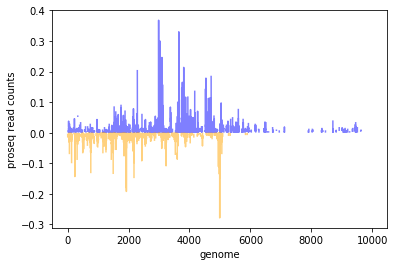

In [12]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.set_xlabel('genome')
ax1.set_ylabel('proseq read counts')
ax1.plot(proseq_positive_values/((np.abs(total_sum_negative)+total_sum ) / 1000000),color='blue',alpha=0.5,label='proseq +ve')
ax1.plot(proseq_negative_values/((np.abs(total_sum_negative)+total_sum ) / 1000000),color='orange',alpha=0.5,label='proseq -ve')
plt.show()